# Predicting Seizure by creating an ML model that uses Fractal Analysis 


* Author: Amal Varghese
* Github: 
* Linkedin:

# Exploratory Data Analysis

In [1]:
# importing necessay libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/intern_dataset.csv')
df.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A


Dataset Information

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912000 entries, 0 to 911999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Time     912000 non-null  object 
 1   Signal1  912000 non-null  float64
 2   Signal2  912000 non-null  float64
 3   Label    912000 non-null  object 
dtypes: float64(2), object(2)
memory usage: 27.8+ MB


shape of the dataset

In [12]:
print(df.shape)

(912000, 4)


Check for missing values

In [4]:
print(f"Number of missing values: {df.isnull().sum()}")

Number of missing values: Time       0
Signal1    0
Signal2    0
Label      0
dtype: int64


Display the statistical summary by label

In [ ]:
# Mean and std by class
print(df.groupby('Label')[['Signal1', 'Signal2']].agg(['mean', 'std', 'min', 'max']))

            Signal1                                            Signal2  \
               mean           std          min           max      mean   
Label                                                                    
A      30900.207581  14506.810996 -2934.328327  67692.652022  0.371612   
B      31693.976570  10693.240850 -1110.867137  67099.772581  0.642296   
C      31364.681913   8864.887863  4111.708945  65678.562412  0.157482   

                                     
            std       min       max  
Label                                
A      0.157220  0.233280  0.869459  
B      0.238301  0.318764  1.356019  
C      0.010161  0.113841  0.223524  


* Distribution of Labels (A, B, C) in the Dataset

Distribution of Labels (A, B, C) in the Dataset
Label
A    318000
B    312000
C    282000
Name: count, dtype: int64


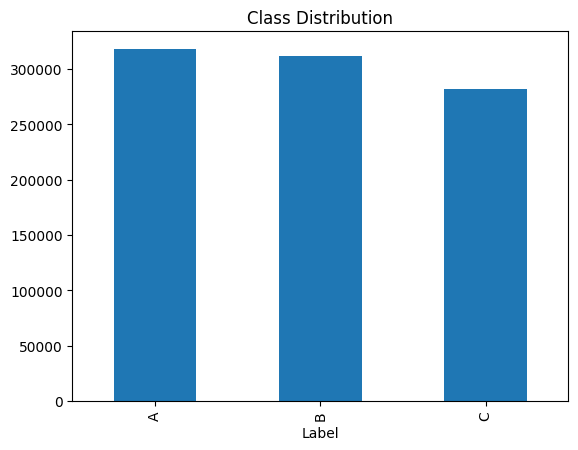

In [14]:
df["Label"].value_counts().plot(kind='bar', title='Class Distribution')
print("Distribution of Labels (A, B, C) in the Dataset")
print(df["Label"].value_counts())

<h5>Visualizing the Dataset</h5>

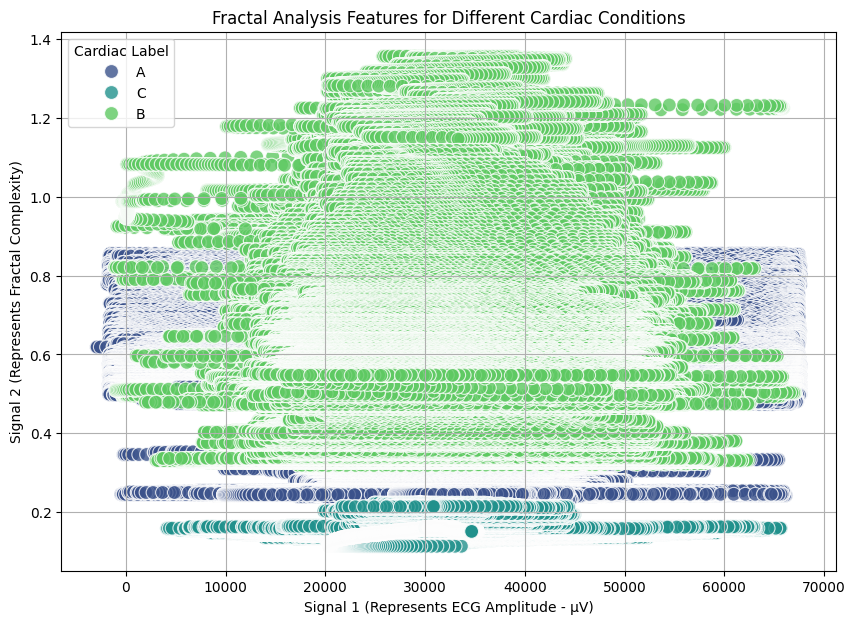

In [17]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Signal1', y='Signal2', hue='Label', palette='viridis', s=100, alpha=0.8)

plt.title('Fractal Analysis Features for Different Cardiac Conditions')
plt.xlabel('Signal 1 (Represents ECG Amplitude - µV)')
plt.ylabel('Signal 2 (Represents Fractal Complexity)')
plt.grid(True)
plt.legend(title='Cardiac Label')
plt.show()

In [ ]:
def get_signal1_signal2(df: pd.DataFrame , label: str , color: str = None) -> None: #type: ignore
    """
    This function plots Signal1 vs Signal2 for a given label in the dataset.
    :param df: DataFrame containing the dataset
    :param label: The label for which the plot is to be generated
    :param color: Color for the scatter plot points
    :return: None
    """
    plt.figure(figsize=(10, 6))
    df_label = df[df['Label'] == label]
    if color:
        plt.scatter(df_label['Signal1'], df_label['Signal2'], alpha=0.6 , color = color)
    else:
        plt.scatter(df_label['Signal1'], df_label['Signal2'], alpha=0.6)

    # Add titles and labels for clarity
    plt.title(f'Signal1 vs. Signal2 for Label {label}')
    plt.xlabel('Signal1')
    plt.ylabel('Signal2')
    plt.grid(True)
    plt.show()

Plot of signal1 vs signal2 for label A

<h3>Normal Sinus Rythm<h3>

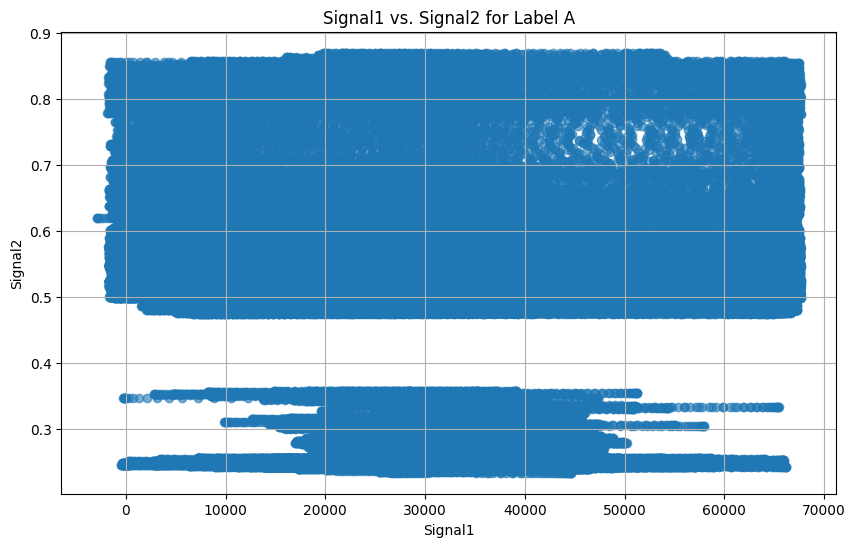

In [27]:
get_signal1_signal2(df , "A")

Interpretation
This scatter plot visualizes the data points that belong exclusively to Label A.

* Signal1 values range roughly from 7,000 to 33,000.
* Signal2 values are consistently high, clustered tightly within the 0.855 to 0.857 range.

<h3>Ventricular Arrhythmia

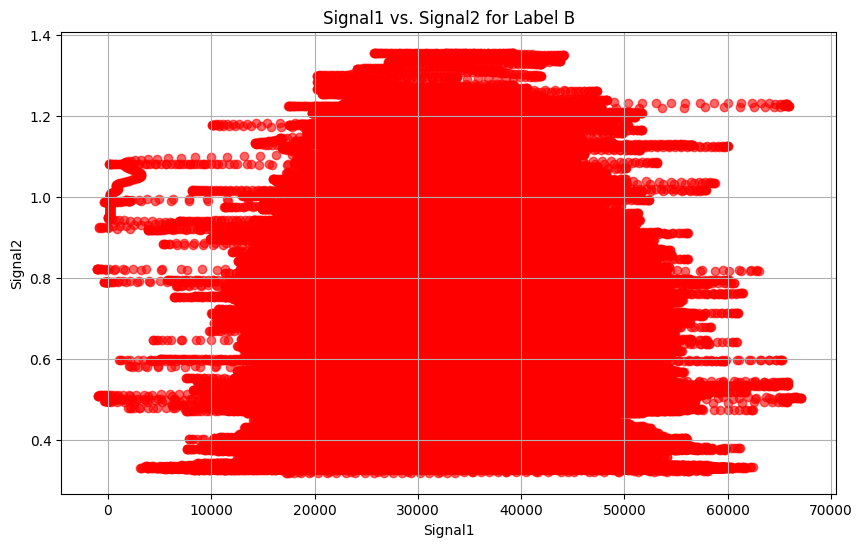

In [28]:
get_signal1_signal2(df , "B" , 'red')

Interpretation:
As shown, the data points for Label B have:

* Signal1 values showing significant spread, indicating the variable amplitudes and sudden spikes (from ~18k to ~49k µV).

* Signal2 values are in the middle range, clustering between approximately 0.49 and 0.55. This matches 30-40% drop in signal complexity from normal.

<h3>Conduction Disorders

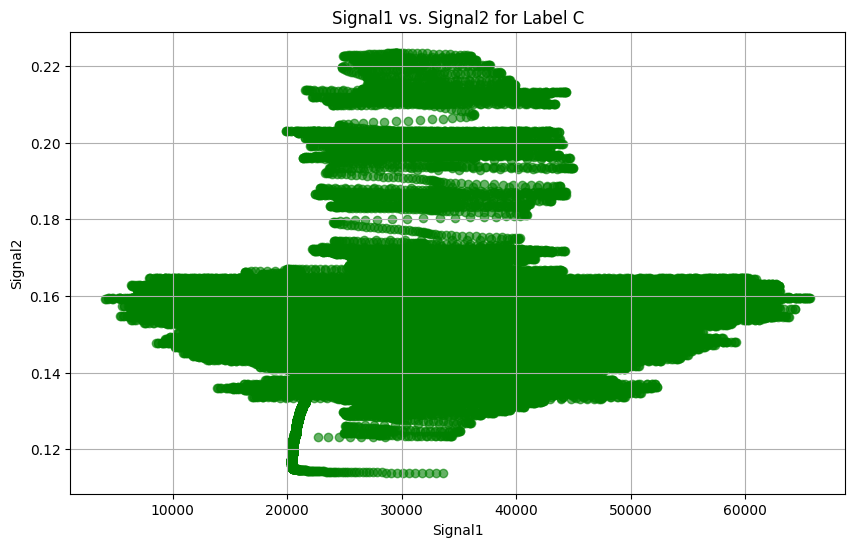

In [29]:
get_signal1_signal2(df , "C" , 'green')

Interpretation:

* Signal1 values that are in a relatively high but narrow band, reflecting the "slow oscillations".

* Signal2 values that are clustered in a very low range, primarily between 0.11 and 0.13. This aligns perfectly with description of a very low fractal complexity for conditions like a complete heart block.

# Conclusion

There is a clear difference in the three labels given in the dataset.

* Signal1 represents ECG Amplitude in micro volts
* Signal2 represents the fractal Complexity

1. Label A (Normal Sinus Rhythm)
Signal Characteristics:
* Signal1: Gradual decay (33k → 7k μV)
    Represents a complete QRS-T complex followed by baseline
* Signal2: Stable high values (0.855-0.856)
    Indicates healthy fractal complexity

2. Label B (Ventricular Arrhythmia)
Signal Characteristics:
* Signal1:
    Sudden spikes (18k→49k μV in B1, 25k→41k μV in B2)
    Plateau patterns (e.g., 49k→49k μV)
* Signal2:
    Medium range (0.499-0.546)
    30-40% drop from normal
Clinical Indicators:
* Monomorphic VT:
    Repeated identical wide complexes (B1 plateau at 49k μV)
    Signal2 ~0.499 matches reduced chaos in VT
* Polymorphic VT:
    Variable amplitudes (B2's 25k→41k μV jump)
    Slightly higher Signal2 (0.546) reflects more chaos than monomorphic VT

3. Label C (Conduction Disorders)
Bradycardic Pattern (C)
* Signal1: Slow oscillations (32k→34k μV)
* Signal2: Very low (0.113-0.123)
* Interpretation:
* Complete heart block (no P-waves, extreme regularity)
* Matches known DFA-α <0.15 in 3rd-degree AV bloc

Ideal fractal complexity for is around values of 0.855 to 0.856 for a normal adult